<a href="https://colab.research.google.com/github/dcandrader/IA_2025.2/blob/main/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Carga de librerias y recursos

!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from progressbar import progressbar as pbar
from local.lib import mlutils
%matplotlib inline

In [2]:
#Carga de datos directamente de Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [ ]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 2.33GB/s]


In [ ]:
!unzip udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [2]:
#Lectura de datos
d_train = pd.read_csv('train.csv')
d_test = pd.read_csv('test.csv')

In [4]:
d_train.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [5]:
#Número de columnas y filas
print("Número de columnas:", d_train.shape[1])
print("Número de filas:", d_train.shape[0])

Número de columnas: 21
Número de filas: 692500


In [6]:
#Tipo de datos
d_train.dtypes

,0
ID,int64
PERIODO_ACADEMICO,int64
E_PRGM_ACADEMICO,object
E_PRGM_DEPARTAMENTO,object
E_VALORMATRICULAUNIVERSIDAD,object
E_HORASSEMANATRABAJA,object
F_ESTRATOVIVIENDA,object
F_TIENEINTERNET,object
F_EDUCACIONPADRE,object
F_TIENELAVADORA,object


In [4]:
#Converir "objet" en "category"
for col in d_train.select_dtypes(include='object').columns:
    d_train[col] = d_train[col].astype('category')

In [3]:
#Valores faltantes por columna
k = d_train.isna().sum()
k[k!=0]

,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,30857
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773
F_TIENEAUTOMOVIL,43623
E_PAGOMATRICULAPROPIO,6498
F_TIENECOMPUTADOR,38103
F_TIENEINTERNET.1,26629


In [5]:
#Inspeccionar columnas con valores faltantes

cols_con_faltantes = k[k != 0].index
for col in cols_con_faltantes:
    print(f"\n🔹 Columna: {col}")
    tabla = (
        d_train
        .groupby(d_train[col].isna())['RENDIMIENTO_GLOBAL']
        .value_counts(normalize=True)
        .unstack()
    )
    print(tabla)



🔹 Columna: E_VALORMATRICULAUNIVERSIDAD
RENDIMIENTO_GLOBAL               alto      bajo  medio-alto  medio-bajo
E_VALORMATRICULAUNIVERSIDAD                                            
False                        0.252589  0.250313    0.247926    0.249172
True                         0.364085  0.193892    0.236838    0.205185

🔹 Columna: E_HORASSEMANATRABAJA
RENDIMIENTO_GLOBAL        alto      bajo  medio-alto  medio-bajo
E_HORASSEMANATRABAJA                                            
False                 0.254791  0.247319    0.248060    0.249830
True                  0.228084  0.303011    0.242797    0.226108

🔹 Columna: F_ESTRATOVIVIENDA
RENDIMIENTO_GLOBAL      alto      bajo  medio-alto  medio-bajo
F_ESTRATOVIVIENDA                                             
False               0.255476  0.246425    0.248619    0.249479
True                0.215079  0.319165    0.231509    0.234247

🔹 Columna: F_TIENEINTERNET
RENDIMIENTO_GLOBAL      alto      bajo  medio-alto  medio-bajo
F_TIEN

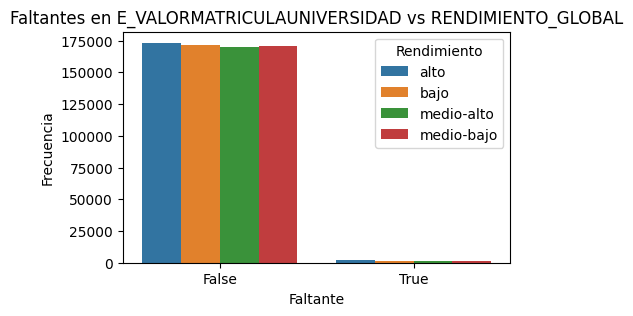

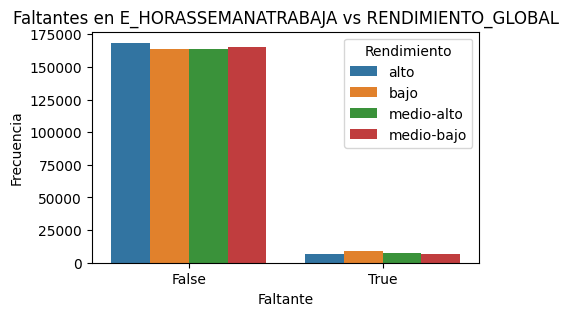

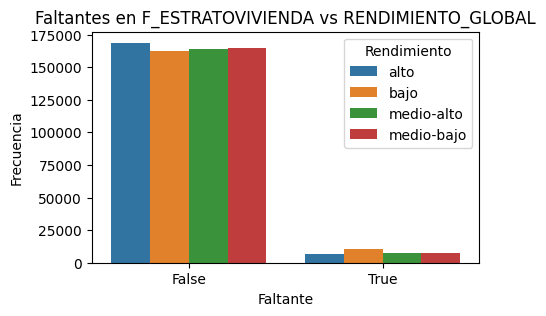

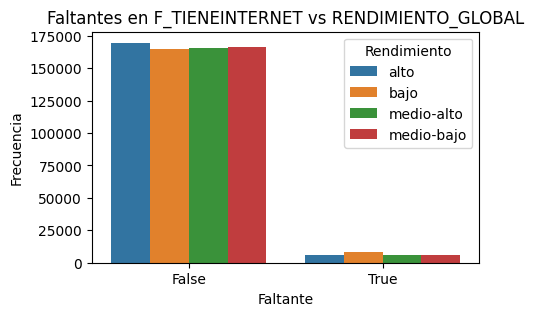

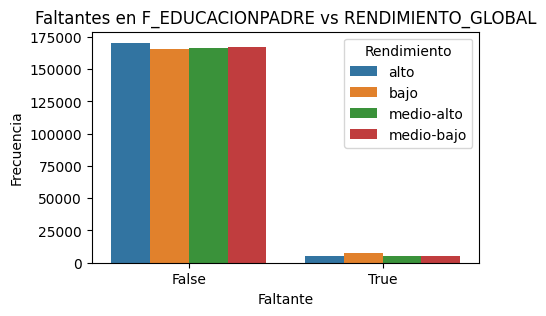

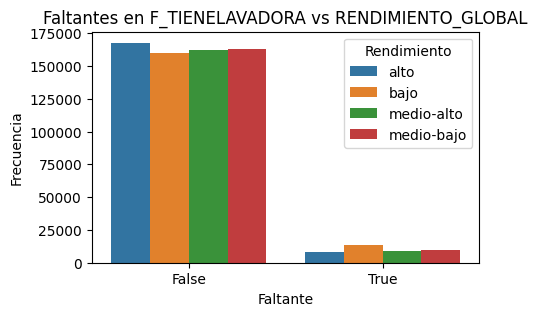

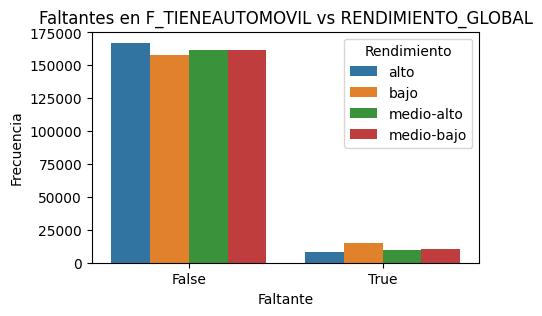

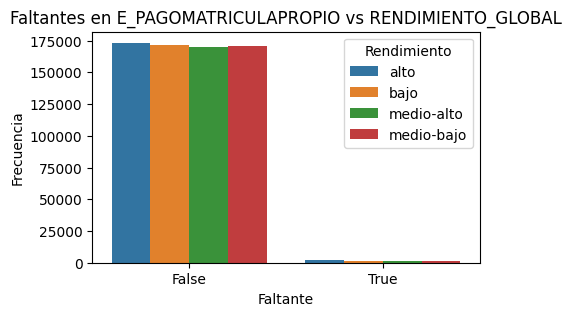

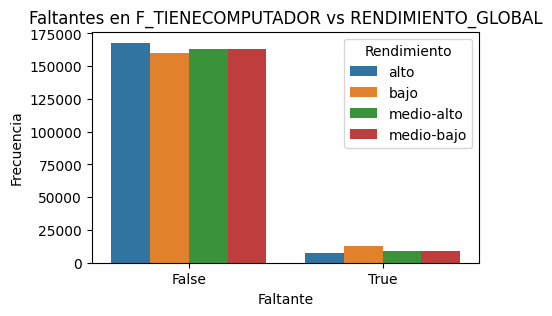

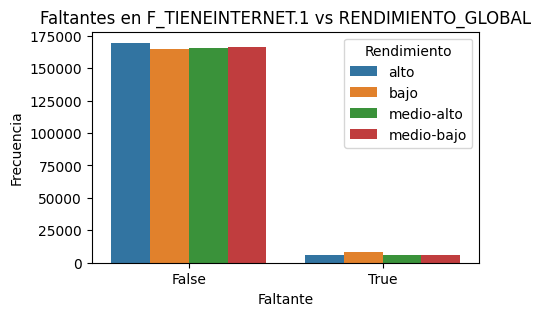

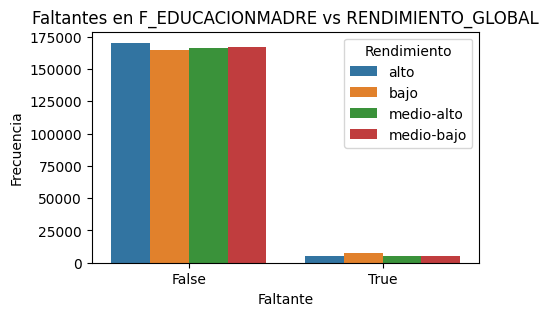

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in cols_con_faltantes:
    plt.figure(figsize=(5,3))
    sns.countplot(x=d_train[col].isna(), hue=d_train['RENDIMIENTO_GLOBAL'])
    plt.title(f'Faltantes en {col} vs RENDIMIENTO_GLOBAL')
    plt.xlabel('Faltante')
    plt.ylabel('Frecuencia')
    plt.legend(title='Rendimiento')
    plt.show()

In [6]:
#Imputación de variables manteniendo una categoría

for col in cols_con_faltantes:
    if col in d_train.columns:
        d_train[col] = d_train[col].cat.add_categories(['Desconocido'])
        d_train[col] = d_train[col].fillna('Desconocido')


In [12]:
#Valores faltantes por columna
k = d_train.isna().sum()
k[k!=0]

,0


In [7]:
#Convertir periodo académico en variable numerica ordenada de enteros positivos
orden = sorted(d_train['PERIODO_ACADEMICO'].unique())
mapa_periodos = {valor: i for i, valor in enumerate(orden)}

d_train['PERIODO_ACADEMICO'] = d_train['PERIODO_ACADEMICO'].map(mapa_periodos)
d_train['PERIODO_ACADEMICO'] = d_train['PERIODO_ACADEMICO'].astype('Int64')

In [8]:
#Tipo de datos
d_train.dtypes

,0
ID,int64
PERIODO_ACADEMICO,Int64
E_PRGM_ACADEMICO,category
E_PRGM_DEPARTAMENTO,category
E_VALORMATRICULAUNIVERSIDAD,category
E_HORASSEMANATRABAJA,category
F_ESTRATOVIVIENDA,category
F_TIENEINTERNET,category
F_EDUCACIONPADRE,category
F_TIENELAVADORA,category


In [9]:
#Inspeccionar columnas numericas
d_train.describe()

,ID,PERIODO_ACADEMICO,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
count,692500.000000,692500.0,692500.000000,692500.000000,692500.000000,692500.000000
mean,494606.130576,4.027817,0.268629,0.259996,0.262087,0.262903
std,285585.209455,2.707125,0.122130,0.093480,0.058862,0.067944
min,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,3.0,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,3.0,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,6.0,0.314000,0.309000,0.293000,0.303000
max,989286.000000,8.0,0.657000,0.487000,0.320000,0.332000


In [10]:
#Normalizar columnas numericas

cols_normal = ['INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']
scaler = StandardScaler()
d_train[cols_normal] = scaler.fit_transform(d_train[cols_normal])
print(d_train[cols_normal].describe())

        INDICADOR_1   INDICADOR_2   INDICADOR_3   INDICADOR_4
count  6.925000e+05  6.925000e+05  6.925000e+05  6.925000e+05
mean  -1.178013e-16 -1.450533e-16  2.177513e-15 -7.410679e-16
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00
min   -2.199542e+00 -2.781294e+00 -4.452543e+00 -3.869422e+00
25%   -5.373728e-01 -5.134332e-01 -1.373936e-01 -1.163206e-01
50%   -2.344159e-01  1.177168e-01  2.363596e-01  3.252207e-01
75%    3.714978e-01  5.242203e-01  5.251688e-01  5.901454e-01
max    3.179990e+00  2.428368e+00  9.838658e-01  1.016969e+00


In [11]:
#Inspeccionar columnas categóricas
d_train.describe(include='category')

,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
count,692500,692500,692500,692500,692500,692500,692500,692500,692500,692500,692500,692500,692500,692500,692500
unique,948,31,9,6,8,3,13,3,3,2,3,3,3,13,4
top,DERECHO,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
freq,53244,282159,204048,249352,232671,592514,128289,563390,412606,692466,382201,597670,592514,141744,175619


In [18]:
#Valores únicos de columnas categóricas
for col in d_train.describe(include='category').columns:
    print(col, d_train[col].unique())

E_PRGM_ACADEMICO ['ENFERMERIA', 'DERECHO', 'MERCADEO Y PUBLICIDAD', 'ADMINISTRACION DE EMPRESAS', 'PSICOLOGIA', ..., 'PROFESIONAL UNIVERSITARIO EN DISEÑO TEXTIL PA..., 'QUIMICA Y FARMACIA', 'LICENCIATURA EN EDUCACON FISICA, RECREACION Y..., 'COMUNICACIÓN SOCIAL Y PERIODISMO', 'PROFESIONAL EN INVESTIGACIÓN CRIMINAL']
Length: 948
Categories (948, object): ['3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES', 'ACTIVIDAD FISICA Y DEPORTE', 'ACUICULTURA',
                           'ADMINISTRACION', ..., 'TRADUCCION INGLES-FRANCES-ESPAÑOL', 'TURISMO',
                           'URBANISMO', 'ZOOTECNIA']
E_PRGM_DEPARTAMENTO ['BOGOTÁ', 'ATLANTICO', 'SANTANDER', 'ANTIOQUIA', 'HUILA', ..., 'ARAUCA', 'GUAVIARE', 'AMAZONAS', 'VAUPES', 'SAN ANDRES']
Length: 31
Categories (31, object): ['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLANTICO', ..., 'SUCRE', 'TOLIMA',
                          'VALLE', 'VAUPES']
E_VALORMATRICULAUNIVERSIDAD ['Entre 5.5 millones y menos de 7 millones', 'Entre 2.5 millones y menos 

In [12]:
#Convertir a enteros los valores de columnas categoricas con orden natural

orden_valor = [
    'Menos de 500 mil',
    'Entre 500 mil y menos de 1 millón',
    'Entre 1 millón y menos de 2.5 millones',
    'Entre 2.5 millones y menos de 4 millones',
    'Entre 4 millones y menos de 5.5 millones',
    'Entre 5.5 millones y menos de 7 millones',
    'Más de 7 millones',
    'No pagó matrícula',
    'Desconocido'
]
d_train['E_VALORMATRICULAUNIVERSIDAD'] = pd.Categorical(
    d_train['E_VALORMATRICULAUNIVERSIDAD'],
    categories=orden_valor,
    ordered=True
).codes

orden_horas = [
    '0',
    'Menos de 10 horas',
    'Entre 11 y 20 horas',
    'Entre 21 y 30 horas',
    'Más de 30 horas',
    'Desconocido'
]
d_train['E_HORASSEMANATRABAJA'] = pd.Categorical(
    d_train['E_HORASSEMANATRABAJA'],
    categories=orden_horas,
    ordered=True
).codes

orden_estrato = [
    'Estrato 1',
    'Estrato 2',
    'Estrato 3',
    'Estrato 4',
    'Estrato 5',
    'Estrato 6',
    'Sin Estrato',
    'Desconocido'
]

d_train['F_ESTRATOVIVIENDA'] = pd.Categorical(
    d_train['F_ESTRATOVIVIENDA'],
    categories=orden_estrato,
    ordered=True
).codes

orden_educacion = [
    'Ninguno',
    'Primaria incompleta',
    'Primaria completa',
    'Secundaria (Bachillerato) incompleta',
    'Secundaria (Bachillerato) completa',
    'Técnica o tecnológica incompleta',
    'Técnica o tecnológica completa',
    'Educación profesional incompleta',
    'Educación profesional completa',
    'Postgrado',
    'No Aplica',
    'No sabe',
    'Desconocido'
]

for col in ['F_EDUCACIONPADRE', 'F_EDUCACIONMADRE']:
    d_train[col] = pd.Categorical(
        d_train[col],
        categories=orden_educacion,
        ordered=True
    ).codes


In [13]:
#Convertir las demás columnas categoricas a one-hot

cat_cols = [c for c in d_train.select_dtypes(include=['category']).columns if c!='RENDIMIENTO_GLOBAL']

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = encoder.fit_transform(d_train[cat_cols])

# DataFrame con nombres de columnas
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols), index=d_train.index)

# Unir con columnas numéricas originales
d_train_encoded = pd.concat([d_train.drop(columns=cat_cols), encoded_df], axis=1)

print(d_train_encoded.shape)
d_train_encoded.head()


(692500, 1011)


,ID,PERIODO_ACADEMICO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_EDUCACIONPADRE,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,...,E_PRIVADO_LIBERTAD_S,E_PAGOMATRICULAPROPIO_Desconocido,E_PAGOMATRICULAPROPIO_No,E_PAGOMATRICULAPROPIO_Si,F_TIENECOMPUTADOR_Desconocido,F_TIENECOMPUTADOR_No,F_TIENECOMPUTADOR_Si,F_TIENEINTERNET.1_Desconocido,F_TIENEINTERNET.1_No,F_TIENEINTERNET.1_Si
0,904256,7,5,1,2,5,9,medio-alto,0.437002,-0.556223,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,645256,7,3,0,2,6,5,bajo,0.346934,-0.481341,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,308367,6,3,4,2,4,4,bajo,0.232301,-0.492038,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,470353,3,4,0,3,11,4,alto,1.771650,-0.941332,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,989032,7,3,3,2,2,2,medio-bajo,0.387874,-0.299484,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [3]:
#Función para preprocesado de datos

def procesado_datos(d):
  for col in d.select_dtypes(include='object').columns:
    d[col] = d[col].astype('category')

  k = d.isna().sum()
  cols_con_faltantes = k[k != 0].index
  for col in cols_con_faltantes:
    if col in d.columns:
        d[col] = d[col].cat.add_categories(['Desconocido'])
        d[col] = d[col].fillna('Desconocido')

  orden = sorted(d['PERIODO_ACADEMICO'].unique())
  mapa_periodos = {valor: i for i, valor in enumerate(orden)}

  d['PERIODO_ACADEMICO'] = d['PERIODO_ACADEMICO'].map(mapa_periodos)
  d['PERIODO_ACADEMICO'] = d['PERIODO_ACADEMICO'].astype('Int64')

  cols_normal = ['INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']
  scaler = StandardScaler()
  d_train[cols_normal] = scaler.fit_transform(d_train[cols_normal])

  orden_valor = [
    'Menos de 500 mil',
    'Entre 500 mil y menos de 1 millón',
    'Entre 1 millón y menos de 2.5 millones',
    'Entre 2.5 millones y menos de 4 millones',
    'Entre 4 millones y menos de 5.5 millones',
    'Entre 5.5 millones y menos de 7 millones',
    'Más de 7 millones',
    'No pagó matrícula',
    'Desconocido'
  ]
  d['E_VALORMATRICULAUNIVERSIDAD'] = pd.Categorical(
    d['E_VALORMATRICULAUNIVERSIDAD'],
    categories=orden_valor,
    ordered=True
  ).codes

  orden_horas = [
    '0',
    'Menos de 10 horas',
    'Entre 11 y 20 horas',
    'Entre 21 y 30 horas',
    'Más de 30 horas',
    'Desconocido'
  ]
  d['E_HORASSEMANATRABAJA'] = pd.Categorical(
    d['E_HORASSEMANATRABAJA'],
    categories=orden_horas,
    ordered=True
  ).codes

  orden_estrato = [
    'Estrato 1',
    'Estrato 2',
    'Estrato 3',
    'Estrato 4',
    'Estrato 5',
    'Estrato 6',
    'Sin Estrato',
    'Desconocido'
  ]

  d['F_ESTRATOVIVIENDA'] = pd.Categorical(
    d['F_ESTRATOVIVIENDA'],
    categories=orden_estrato,
    ordered=True
  ).codes

  orden_educacion = [
    'Ninguno',
    'Primaria incompleta',
    'Primaria completa',
    'Secundaria (Bachillerato) incompleta',
    'Secundaria (Bachillerato) completa',
    'Técnica o tecnológica incompleta',
    'Técnica o tecnológica completa',
    'Educación profesional incompleta',
    'Educación profesional completa',
    'Postgrado',
    'No Aplica',
    'No sabe',
    'Desconocido'
  ]

  for col in ['F_EDUCACIONPADRE', 'F_EDUCACIONMADRE']:
    d[col] = pd.Categorical(
        d[col],
        categories=orden_educacion,
        ordered=True
    ).codes

  cat_cols = [c for c in d.select_dtypes(include=['category']).columns if c!='RENDIMIENTO_GLOBAL']

  encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
  encoded = encoder.fit_transform(d[cat_cols])

  encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols), index=d.index)
  d_encoded = pd.concat([d.drop(columns=cat_cols), encoded_df], axis=1)

  return d_encoded


In [4]:
train_procesados = procesado_datos(d_train)
train_procesados.head()

,ID,PERIODO_ACADEMICO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_EDUCACIONPADRE,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,...,E_PRIVADO_LIBERTAD_S,E_PAGOMATRICULAPROPIO_Desconocido,E_PAGOMATRICULAPROPIO_No,E_PAGOMATRICULAPROPIO_Si,F_TIENECOMPUTADOR_Desconocido,F_TIENECOMPUTADOR_No,F_TIENECOMPUTADOR_Si,F_TIENEINTERNET.1_Desconocido,F_TIENEINTERNET.1_No,F_TIENEINTERNET.1_Si
0,904256,7,5,1,2,5,9,medio-alto,0.437002,-0.556223,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,645256,7,3,0,2,6,5,bajo,0.346934,-0.481341,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,308367,6,3,4,2,4,4,bajo,0.232301,-0.492038,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,470353,3,4,0,3,11,4,alto,1.771650,-0.941332,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,989032,7,3,3,2,2,2,medio-bajo,0.387874,-0.299484,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
